In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('studentmath.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)


In [7]:
columns_to_convert = ['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for col in columns_to_convert:
    assign_cat_codes(df, col)

In [8]:
df.head()

,school_cat,sex_cat,age,address_cat,famsize_cat,Pstatus_cat,Medu,Fedu,Mjob_cat,Fjob_cat,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.dtypes

school_cat         int8
sex_cat            int8
age               int64
address_cat        int8
famsize_cat        int8
Pstatus_cat        int8
Medu              int64
Fedu              int64
Mjob_cat           int8
Fjob_cat           int8
reason_cat         int8
guardian_cat       int8
traveltime        int64
studytime         int64
failures          int64
schoolsup_cat      int8
famsup_cat         int8
paid_cat           int8
activities_cat     int8
nursery_cat        int8
higher_cat         int8
internet_cat       int8
romantic_cat       int8
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
G1                int64
G2                int64
G3                int64
dtype: object

In [10]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 


In [11]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)
ranf = RandomForestRegressor(random_state=0)
rf= ranf.fit(X_train,y_train)
scores_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores_rf
print(np.mean(scores_rf))

y_pred_rf = cross_val_predict(ranf, X_test,y_test)
scores_test_rf= cross_val_score(ranf, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_rf))

-2.329438881048387
-4.793025


In [13]:
import numpy as np
import pandas as pd

def impute_missing_values(X_train, X_test, y_train, kappa):
    y_train_np = y_train.to_numpy()
    mean_values = X_train.apply(lambda col: y_train.groupby(X_train[col.name]).mean())

    unique_values = {col: X_train[col].unique() for col in X_train.columns}
    imputed_values_train = {}
    imputed_values_test = {}

    for col in X_train.columns:
        imputed_values_train[col] = {val: mean_values[col][val] for val in unique_values[col]}
        imputed_values_test[col] = {val: mean_values[col][val] for val in unique_values[col] if val in X_test[col].unique()}

        extra_values = set(X_test[col].unique()) - set(unique_values[col])
        if extra_values:
            X_train_imputed = X_train.copy()
            X_test_imputed = X_test.copy()

    for col in X_train.columns:
        X_train_imputed[col] = X_train[col].map(imputed_values_train[col])

    for col in X_test.columns:
        X_test_imputed[col] = X_test[col].apply(lambda x: imputed_values_test[col].get(x, np.nan))

    for col in X_test_imputed.columns:
        missing_indices = X_test_imputed[X_test_imputed[col].isna()].index

        if len(missing_indices) > 0:
            d = np.linalg.norm(X_test.loc[missing_indices].values[:, np.newaxis] - X_train.values, axis=2)

            for i, idx in enumerate(missing_indices):
                l = 0
                v = 0
                for j in range(len(y_train)):
                    l += y_train_np[j] / ((1 + d[i, j]) ** kappa)
                    v += 1 / ((1 + d[i, j]) ** kappa)
                imputed_value = l / v
                X_test_imputed.at[idx, col] = imputed_value

    return X_train_imputed, X_test_imputed


In [14]:
X_trainnew, X_testnew=impute_missing_values(X_train, X_test, y_train, kappa=10)

In [15]:
X_testnew

,school_cat,sex_cat,age,address_cat,famsize_cat,Pstatus_cat,Medu,Fedu,Mjob_cat,Fjob_cat,...,romantic_cat,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
329,10.49635,9.993939,10.493671,10.818930,10.250000,10.410526,11.990099,11.569620,10.957447,12.045455,...,9.788991,10.360759,9.706349,10.670000,10.887324,9.794521,10.698113,11.212766,13.666667,14.111111
318,10.49635,9.993939,10.493671,9.328767,10.250000,10.410526,10.166667,11.569620,8.860000,10.747253,...,10.835749,10.360759,9.706349,9.535211,9.109375,10.826087,10.500000,8.831461,11.161290,11.033333
317,10.49635,9.993939,9.522388,10.818930,10.250000,10.410526,11.990099,10.500000,10.037383,9.971098,...,9.788991,10.360759,9.706349,9.535211,10.887324,11.035088,10.500000,16.000000,8.160000,10.000000
65,10.49635,9.993939,10.654321,10.818930,11.021739,10.410526,11.990099,10.500000,10.957447,10.747253,...,10.835749,10.833333,10.400000,10.670000,10.887324,9.794521,11.921053,11.720000,16.052632,15.307692
59,10.49635,9.993939,10.654321,10.818930,10.250000,10.410526,11.990099,10.151163,10.977528,9.971098,...,10.835749,10.360759,11.660377,10.670000,10.887324,11.035088,10.500000,11.720000,14.684211,16.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,10.49635,9.993939,9.522388,9.328767,10.250000,11.064516,10.166667,10.151163,10.037383,10.747253,...,9.788991,10.360759,10.909091,10.722222,10.887324,11.035088,10.500000,8.020406,9.121951,8.487179
140,10.49635,11.000000,11.742424,10.818930,10.250000,10.410526,11.990099,10.500000,10.957447,10.747253,...,10.835749,11.076923,11.660377,11.270588,10.887324,11.035088,9.945946,8.831461,5.562500,8.487179
142,10.49635,9.993939,11.742424,10.818930,10.250000,10.410526,11.990099,11.569620,10.957447,10.747253,...,10.835749,10.360759,11.660377,11.270588,10.887324,11.035088,10.500000,11.720000,8.160000,11.033333
306,10.49635,11.000000,12.000000,10.818930,10.250000,11.064516,10.166667,10.151163,10.977528,9.971098,...,10.835749,10.833333,11.645161,10.670000,10.887324,11.035088,10.500000,8.831461,16.800000,18.285714


In [16]:
X_testnew.isnull().sum()

school_cat        0
sex_cat           0
age               0
address_cat       0
famsize_cat       0
Pstatus_cat       0
Medu              0
Fedu              0
Mjob_cat          0
Fjob_cat          0
reason_cat        0
guardian_cat      0
traveltime        0
studytime         0
failures          0
schoolsup_cat     0
famsup_cat        0
paid_cat          0
activities_cat    0
nursery_cat       0
higher_cat        0
internet_cat      0
romantic_cat      0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences          0
G1                0
G2                0
dtype: int64

In [17]:
X_test= X_testnew
X_train= X_trainnew

In [18]:
def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)

kappa = 5.000, avg MSE = 6.657
kappa = 6.000, avg MSE = 5.570
kappa = 7.000, avg MSE = 4.842
kappa = 8.000, avg MSE = 4.360
kappa = 9.000, avg MSE = 4.044
kappa = 10.000, avg MSE = 3.843
kappa = 11.000, avg MSE = 3.723
kappa = 12.000, avg MSE = 3.660
kappa = 15.000, avg MSE = 3.665
kappa = 20.000, avg MSE = 3.898


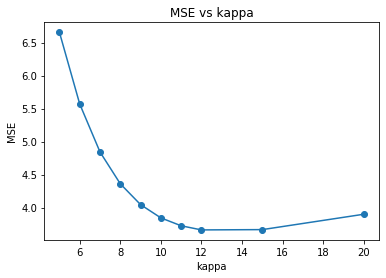

In [19]:
kf = KFold(n_splits=10)
kappa_values = np.array([5,6,7,8,9,10,11,12,15,20])
mse_values = []

for kappa in kappa_values:
    mse = 0.0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        y_pred = prop_reg(X_test, X_train, y_train, y_test, kappa)
        mse += mean_squared_error(y_test, y_pred)
    mse /= kf.get_n_splits(X)
    mse_values.append(mse)
    print(f"kappa = {kappa:.3f}, avg MSE = {mse:.3f}")

# plot the MSE vs kappa curve
plt.plot(kappa_values, mse_values, '-o')
plt.xlabel('kappa')
plt.ylabel('MSE')
plt.title('MSE vs kappa')
plt.show()

In [20]:
# find the index of the minimum MSE value
min_index = np.argmin(mse_values)

# print the minimum MSE value and the corresponding kappa value
print(f"Minimum MSE: {mse_values[min_index]:.3f}, Kappa value: {kappa_values[min_index]}")


Minimum MSE: 3.660, Kappa value: 12
